In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
test = h5py.File("/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/data/hep_data/electron.hdf5","r")
x_e = test.get('X')
y_e = test.get('y')

test = h5py.File("/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/data/hep_data/photon.hdf5","r")
x_p = test.get('X')
y_p = np.ones(x_p)


y_e

TypeError: expected a sequence of integers or a single integer, got '<HDF5 dataset "X": shape (249000, 32, 32, 2), type "<f4">'

MinMaxScaler()
1.0


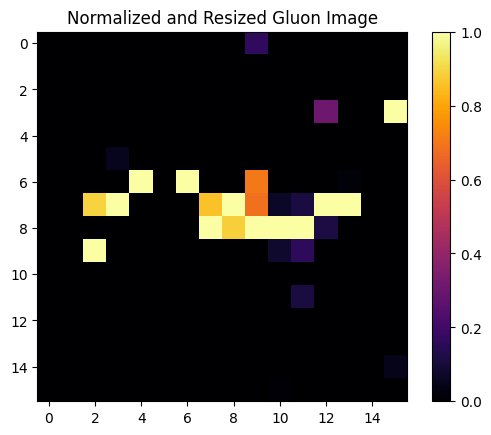

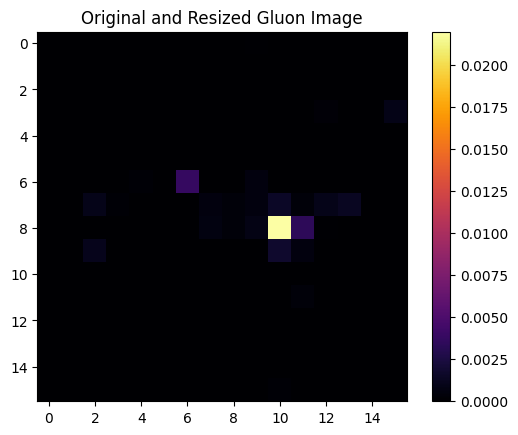

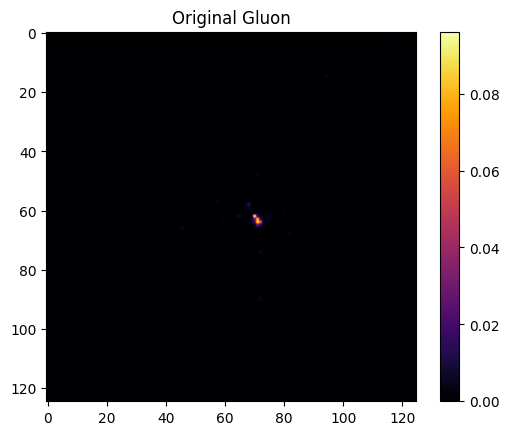

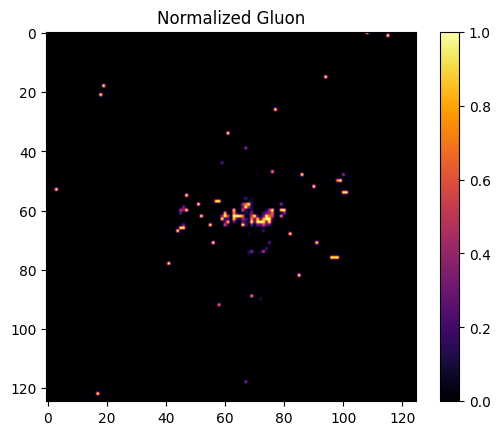

In [17]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


sample = 5

data = x_s[sample,:,:,1]
scale = 16
cropped = tf.image.central_crop(data.reshape(125, 125,1), 0.4)
reduced_sample = tf.image.resize(cropped, (scale, scale), method="bilinear").numpy()


scaler = MinMaxScaler()
print(scaler.fit(reduced_sample.reshape(scale,scale)))

scaled_data = scaler.transform(reduced_sample.reshape(scale,scale))

print(y_s[sample])
plt.imshow(scaled_data, cmap = "inferno")
plt.title("Normalized and Resized Gluon Image")
plt.colorbar()
plt.show()
plt.imshow(reduced_sample, cmap = "inferno")
plt.title("Original and Resized Gluon Image")
plt.colorbar()
plt.show()

plt.imshow(data, cmap = "inferno")
plt.title("Original Gluon")
plt.colorbar()
plt.show()

scaler.fit(data.reshape(125,125))
original_norm_data = scaler.transform(data)

plt.imshow(original_norm_data, cmap = "inferno")
plt.title("Normalized Gluon")
plt.colorbar()
plt.show()


In [21]:
# preprocess images in ECAL channel only 
#n_samples = 10000
#scale = 16
#x_red = []


#for sample in range(n_samples):
#    data = x_s[sample,:,:,1]
#    cropped = tf.image.central_crop(data.reshape(125, 125,1), 0.3)
#    reduced_sample = tf.image.resize(cropped, (scale, scale), method="bilinear").numpy()
#    scaler = MinMaxScaler()
#    scaler.fit(reduced_sample.reshape(scale,scale))
#    scaled_data = scaler.transform(reduced_sample.reshape(scale,scale))
#    x_red.append(scaled_data)


In [29]:
y_red = y_s[:10000]
y_red = y_red*2-1
y_red

array([-1., -1.,  1., ..., -1., -1., -1.], dtype=float32)

In [33]:
# Guardando los datos en un archivo h5py
#with h5py.File('/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/data/hep_data/quark-gluon-16x16-MMS.h5', 'w') as f:
#    f.create_dataset('x_red', data=x_red)
#    f.create_dataset('y_red', data=y_red)

#print("quark_gluon_data.h5 saved")

quark_gluon_data.h5 saved


In [42]:
from sklearn.model_selection import train_test_split

test = h5py.File("/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/data/hep_data/quark-gluon-16x16-MMS.h5","r")
x_s = test.get('x_red')
y_s = test.get('y_red')

X_train, X_test, Y_train, Y_test = train_test_split( np.array(x_s), np.array(y_s), test_size=0.25)

X_train.shape


(7500, 16, 16)

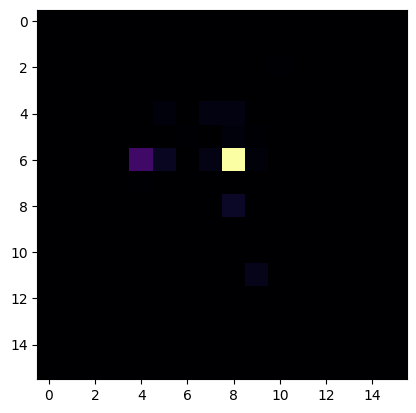

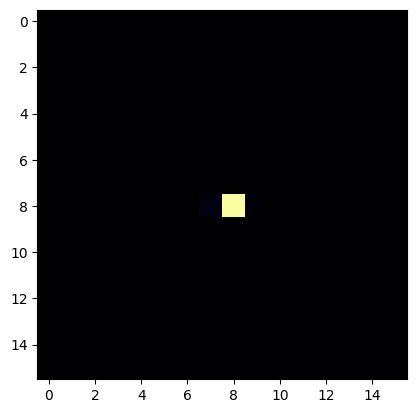

In [ ]:
plt.imshow(quark[0], cmap='inferno')
plt.show()
plt.imshow(gluon[0], cmap='inferno')
plt.show()

## Classical CNN

In [44]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir la arquitectura del modelo
model = Sequential([
    Conv2D(1, (3, 3), activation='relu', input_shape=(16, 16, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(1, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 1)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 128)               6

0.0


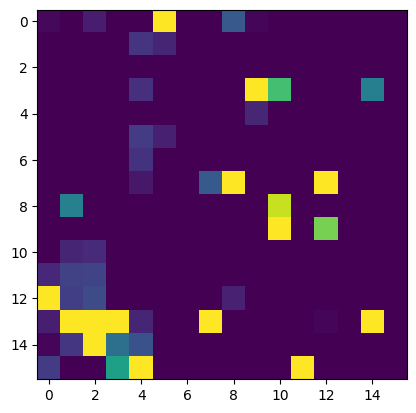

1.0


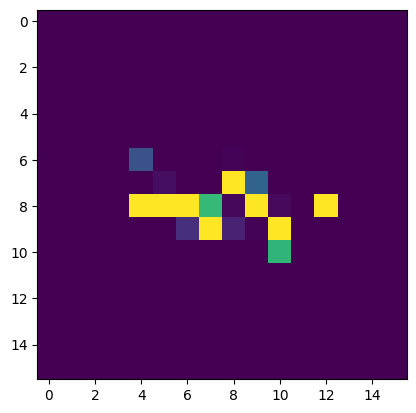

In [54]:
#Y_train = (Y_train+1)/2
#Y_train

print(Y_train[Y_train==0][0])
plt.imshow(X_train[Y_train==0][0])
plt.show()

print(Y_train[Y_train==1][0])
plt.imshow(X_train[Y_train==1][0])
plt.show()

In [56]:
# Entrenar el modelo

history = model.fit(X_train,Y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
188/188 [==============================] - 10s 55ms/step - loss: 0.7008 - accuracy: 0.5318 - val_loss: 0.6552 - val_accuracy: 0.2453
Epoch 2/50
188/188 [==============================] - 2s 11ms/step - loss: 0.6949 - accuracy: 0.5287 - val_loss: 0.6478 - val_accuracy: 0.2213
Epoch 3/50
188/188 [==============================] - 14s 73ms/step - loss: 0.6945 - accuracy: 0.5322 - val_loss: 0.6740 - val_accuracy: 0.2740
Epoch 4/50
188/188 [==============================] - 14s 76ms/step - loss: 0.6899 - accuracy: 0.5303 - val_loss: 0.6637 - val_accuracy: 0.2527
Epoch 5/50
188/188 [==============================] - 12s 66ms/step - loss: 0.6895 - accuracy: 0.5338 - val_loss: 0.6663 - val_accuracy: 0.2600
Epoch 6/50
188/188 [==============================] - 5s 28ms/step - loss: 0.6900 - accuracy: 0.5342 - val_loss: 0.6778 - val_accuracy: 0.2800
Epoch 7/50
188/188 [==============================] - 14s 74ms/step - loss: 0.6883 - accuracy: 0.5433 - val_loss: 0.6809 - val_accuracy: 0

313/313 [==============================] - 2s 5ms/step - loss: 0.6773 - accuracy: 0.5731
Test accuracy: 0.5730999708175659


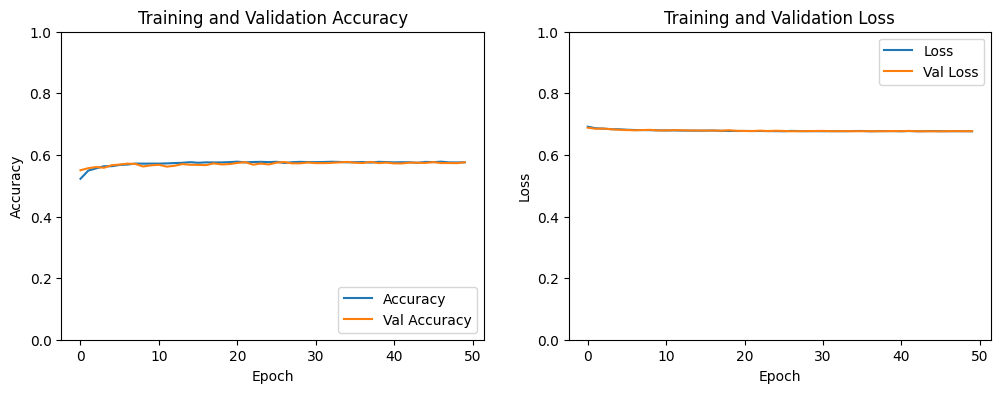

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test))
print(f'Test accuracy: {test_acc}')

# Graficar las métricas de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
